## Creating a Neural Network

Okay now you have reached the exciting part of this tutorial! No more math and complex explinations. Time to get hands on and train a very basic neural network.

As stated earlier this guide is based off of the following TensorFlow tutorial. https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# Step 1: Imports

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Dataset

For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
# Step 2: Dataset

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

Let's have a look at this data to see what we are working with.

In [3]:
train_images.shape
# > (60000, 28, 28)

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [4]:
train_images[0, 23, 23]  # let's have a look at one pixel
# > np.uint8(194)

np.uint8(194)

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels
# > array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [6]:
# Step 3: Create names for labels

class_names = [
    # Clothing class names
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

Fianlly let's look at what some of these images look like!

Show the image #6 (class #7: Sneaker)


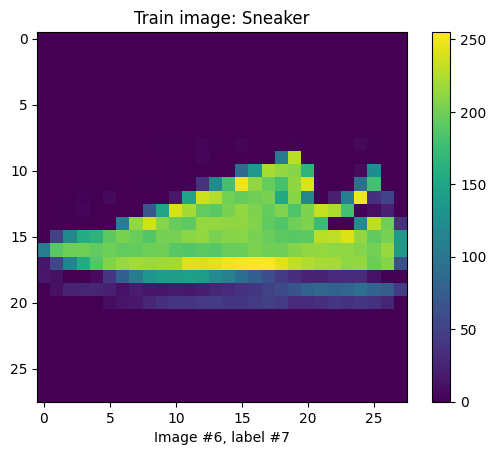

In [8]:
# Step 4: DEBUG: Show a train image

num = 6
image = train_images[num]
label = train_labels[num]
class_name = class_names[label]
print(f"Show the image #{num} (class #{label}: {class_name})")

plt.figure()
plt.title(f"Train image: {class_name}")
plt.xlabel(f"Image #{num}, label #{label}")
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 

In [9]:
# Step 5: Data Preprocessing

train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model

Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [10]:
# Step 6: Building the Model

model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
        keras.layers.Dense(128, activation="relu"),  # hidden layer (2)
        keras.layers.Dense(10, activation="softmax"),  # output layer (3)
    ]
)

d:\Work\Learn\250701-machine-learning-with-python\project\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

## Compile the Model

The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [11]:
# Step 7: Compile the Model

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Training the Model

Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [ ]:
# Step 8: Training the Model

do_epochs = 10
model.fit(train_images, train_labels, epochs=do_epochs)  # We pass the data, labels and epochs and watch the magic!

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7777 - loss: 0.6380
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3887


## Evaluating the Model

Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar." (https://keras.io/models/sequential/)

In [14]:
# Step 8: Evaluating the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8392 - loss: 0.4216
Test loss: 0.42236772179603577
Test accuracy: 0.8398000001907349


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as overfitting.

And now we have a trained model that's ready to use to predict some values!

## Making Predictions

To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [15]:
# Step 9: Making Predictions

predictions = model.predict(test_images)

# 313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step


This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

In [16]:
predictions[0]

# array([4.3684032e-11, 4.7063287e-11, 1.1327360e-14, 7.2166453e-12,
#        4.0533611e-13, 7.0521501e-06, 1.2342988e-10, 1.2951012e-03,
#        3.7609055e-10, 9.9869788e-01], dtype=float32)

array([8.64807807e-05, 7.25706855e-08, 4.69502083e-06, 1.32764239e-06,
       3.01844989e-06, 5.10065667e-02, 1.52582015e-05, 3.87127459e-01,
       2.25246046e-03, 5.59502661e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array. 

In [18]:
np.argmax(predictions[0])

# np.int64(9)

np.int64(9)

And we can check if this is correct by looking at the value of the cooresponding test label.

In [17]:
test_labels[0]

# np.uint8(9)

np.uint8(9)

## Verifying Predictions

I've written a small function here to help us verify predictions with some simple visuals.

In [ ]:
# Step 10: Verifying Predictions


def get_number():
    while True:
        num = input("Pick a test image number (0-9999): ")
        if num.isdigit():
            num = int(num)
            if 0 <= num < 10000:
                return int(num)
        else:
            print("Try again...")


def show_image(image, real_class, predicted_class):
    plt.figure()
    plt.title(f"Predicted: {predicted_class}")
    plt.xlabel(f"Real: {real_class}")
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def predict(model, image, real_label):
    image_array = np.array([image])

    # Get prediction indices list for an image
    prediction = model.predict(image_array)

    real_class = class_names[real_label]

    predicted_label = np.argmax(prediction)
    predicted_class = class_names[predicted_label]

    print("real_label:", real_label)
    print("prediction:", prediction)
    print("predicted_label:", predicted_label)
    print("predicted_class:", predicted_class)
    print("real_class:", real_class)

    print("Show the predicted image")
    show_image(image, real_class, predicted_class)


# Try to predict a test image class
num = 5  # get_number()  # Get the number interactively
print("Using test image:", num)
image = test_images[num]
real_label = test_labels[num]

predict(model, image, real_label)

print("Done")

: 

And that's pretty much it for an introduction to neural networks!